# Introduction to Unsupervised Association Rule

**Unsupervised association rule learning** helps identify relationships between variables without having predefined categories or labels. It is mainly used to find patterns or associations in data, such as identifying products that are frequently purchased together (like Market Basket Analysis) or understanding hidden relationships in customer behavior.

- It can be applied using algorithms such as the **Apriori Algorithm** or **FP-Growth Algorithm**, which find frequent itemsets and create association rules.

## Market Basket Analysis (MBA) Using The Apriori Algorithm

- **Market Basket Analysis (MBA)** is a popular data mining technique used in retail to understand the purchase behavior of customers. It finds associations or relationships between products purchased together, helping businesses create strategic promotions and product placements.
- The **Apriori Algorithm** is a popular method used to extract frequent itemsets and generate association rules in Market Basket Analysis. It operates on the principle that if an itemset is frequent, all of its subsets must also be frequent.
___

#### **Key Terms**:
- **Frequent Itemsets**: Groups of items that often appear together in transactions.

#### Evaluation Metrics
- **Support**: The proportion of transactions that include a particular item set. It helps to identify how frequent an itemset is.
- **Confidence**: The likelihood of purchasing a product, given that another product has already been purchased.
- **Lift**: Measures how much more likely two items are bought together than if they were independent.
___
- More: https://www.youtube.com/watch?v=WGlMlS_Yydk

**Dataset**:
For this example, we'll use a mock transaction dataset with a collection of items purchased together.

In [6]:
# Install necessary libraries
!pip install mlxtend

# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 222.7 kB/s eta 0:00:00a 0:00:01


In [8]:
# Sample transaction dataset
data = {'Transaction': [1, 2, 3, 4, 5],
        'Items': ['Milk, Bread', 'Bread, Butter', 'Milk, Butter, Bread', 'Milk', 'Bread, Butter']}

df = pd.DataFrame(data)
df

,Transaction,Items
0,1,"Milk, Bread"
1,2,"Bread, Butter"
2,3,"Milk, Butter, Bread"
3,4,Milk
4,5,"Bread, Butter"


Each row in this table represents a transaction containing multiple items.

### Step 1: Data Preprocessing
We need to transform the dataset into a one-hot encoded format (True/False for each item)

In [10]:
# Split the 'Items' column into individual items per transaction
transactions = df['Items'].apply(lambda x: x.split(', '))

# display the output
transactions

0            [Milk, Bread]
1          [Bread, Butter]
2    [Milk, Butter, Bread]
3                   [Milk]
4          [Bread, Butter]
Name: Items, dtype: object

In [12]:
# Use TransactionEncoder to convert the list of transactions into a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)

# Display the output
te_data

array([[ True, False,  True],
       [ True,  True, False],
       [ True,  True,  True],
       [False, False,  True],
       [ True,  True, False]])

In [14]:
# Convert to DataFrame
onehot_df = pd.DataFrame(te_data, columns=te.columns_)

onehot_df

,Bread,Butter,Milk
0,True,False,True
1,True,True,False
2,True,True,True
3,False,False,True
4,True,True,False


In the one-hot encoded DataFrame, each column represents an item (like `Milk`, `Bread`, or `Butter`), and each row represents a transaction. A `True` or `False` value indicates whether an item was purchased in that transaction.

### Step 2: Find Frequent Itemsets using Apriori Algorithm

Now, we apply the **Apriori algorithm** to find frequent itemsets.

In [16]:
# We'll set a `min_support` value to control the threshold of how frequent an itemset must be to be considered.

frequent_itemsets = apriori(onehot_df, min_support=0.2, use_colnames=True)
# 'min_support=0.2' means that we are only interested in itemsets that appear in at least 20% of the transactions.

frequent_itemsets

,support,itemsets
0,0.8,(Bread)
1,0.6,(Butter)
2,0.6,(Milk)
3,0.6,"(Bread, Butter)"
4,0.4,"(Milk, Bread)"
5,0.2,"(Milk, Butter)"
6,0.2,"(Milk, Bread, Butter)"


### Step 3: Generate Association Rules
Once we have the frequent itemsets, we can generate **association rules**. We'll calculate the confidence and lift for each rule.

In [18]:
# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# We use 'lift' as the metric to determine how much more likely two items are to be purchased together compared to random chance.
# We use 'min_threshold' to filter the rules to only include those with a lift greater than 1.

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Butter),0.8,0.6,0.6,0.75,1.25,0.12,1.600000,1.00
1,(Butter),(Bread),0.6,0.8,0.6,1.00,1.25,0.12,inf,0.50
2,"(Milk, Butter)",(Bread),0.2,0.8,0.2,1.00,1.25,0.04,inf,0.25
3,(Bread),"(Milk, Butter)",0.8,0.2,0.2,0.25,1.25,0.04,1.066667,1.00


#### Explanation of Results**:
- **Rule 1**: If `Bread` is purchased, there is a **75% chance** that `Butter` is also purchased. The lift of 1.25 suggests they are bought together 25% more often than if they were independent.
- **Rule 2**: If `Butter` is purchased, there is a **100% chance** that `Bread` is also purchased.

#### Visualization of Association Rules
We can visualize the top rules based on lift using a bar plot.

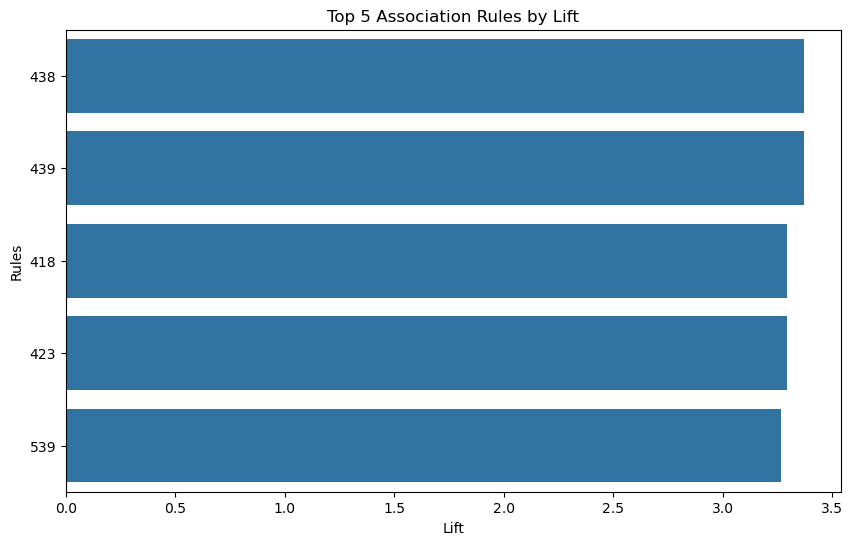

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the rules by lift and select the top 5
top_rules = rules.nlargest(5, 'lift')

# Plot a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y=top_rules.index.astype(str), data=top_rules)
plt.title('Top 5 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()

- The chart visualizes the top 5 association rules ranked by lift.
- Higher lift values indicate stronger associations between items.

 **Key Takeaways**:
- **Unsupervised Association Rule Mining** allows us to discover patterns without predefined labels.
- The **Apriori algorithm** is a common method for finding frequent itemsets, and it works by generating association rules based on support, confidence, and lift.
- **Confidence** and **Lift** are key metrics used to evaluate the strength of associations between items.

## Market Basket Analysis of Groceries Using the Apriori Algorithm

In [22]:
# Install the necessary library
# !pip install mlxtend

# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [24]:
# Load the dataset manually

# Open the groceries.csv file in read mode ('r')
with open("groceries.csv", 'r') as file:
    
    # Read the file line by line, strip any leading/trailing whitespace, 
    # and split each line by commas to create a list of items (i.e., a transaction)
    data = [line.strip().split(',') for line in file]

# Display the first five transactions (each transaction is a list of items)
for transaction in data[:5]:
    print(transaction)

['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']
['tropical fruit', 'yogurt', 'coffee']
['whole milk']
['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads']
['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product']


This dataset contains transactions where each row represents a set of items purchased together.

### Step 1: Data Preprocessing

- Since the dataset is a list of transactions, we need to convert it into a one-hot encoded DataFrame
- Each column will represent an item, and each row will represent whether that item was bought in the transaction.

In [26]:
pd.set_option("display.max_columns", None)

In [28]:
# Create a one-hot encoded DataFrame for the items
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)

df = pd.DataFrame(te_data, columns=te.columns_)

df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,cream cheese,curd,curd cheese,decalcifier,dental care,dessert,detergent,dish cleaner,dishes,dog food,domestic eggs,female sanitary products,finished products,fish,flour,flower (seeds),flower soil/fertilizer,frankfurter,frozen chicken,frozen dessert,frozen fish,frozen fruits,frozen meals,frozen potato products,frozen vegetables,fruit/vegetable juice,grapes,hair spray,ham,hamburger meat,hard cheese,herbs,honey,house keeping products,hygiene articles,ice cream,instant coffee,jam,ketchup,kitchen towels,kitchen utensil,light bulbs,liqueur,liquor,liquor (appetizer),liver loaf,long life bakery product,make up remover,male cosmetics,margarine,mayonnaise,meat,meat spreads,misc. beverages,mustard,napkins,newspapers,nut snack,nuts/prunes,oil,onions,organic products,organic sausage,other vegetables,packaged fruit/vegetables,pasta,pastry,pet care,photo/film,pickled vegetables,pip fruit,popcorn,pork,pot plants,potato products,preservation products,processed cheese,prosecco,pudding powder,ready soups,red/blush wine,rice,roll products,roll products,rolls/buns,root vegetables,rubbing alcohol,rum,salad dressing,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,sound storage medium,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

Each column now represents whether a particular item was purchased in a transaction (True or False).

### Step 2: Apply the Apriori Algorithm to find Frequent Itemsets

In [30]:
# Set a minimum support value to find frequent itemsets that appear in at least 1% of transactions
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets found
frequent_itemsets.head()

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)


In [32]:
frequent_itemsets.shape

(332, 2)

- The 'min_support' parameter controls the threshold for how frequent an itemset must be to be considered.
- Here, we set it to 0.01 (or 1%), meaning we are looking for itemsets that appear in at least 1% of transactions.

### Step 3: Generate Association Rules

In [34]:
# Now we will use the frequent itemsets to generate association rules.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the first few association rules
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416,0.512224
1,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095,0.601792
2,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329,0.307866
3,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337,0.357463
4,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251


- Association rules are created using the frequent itemsets.
- The 'metric' parameter is set to 'lift', which helps identify strong associations between items.

### Step 4: Filter and Sort Rules

In [36]:
# We can filter the rules to focus on those with high confidence or lift values.
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.5)]

# Sort the rules by lift, in descending order
strong_rules = strong_rules.sort_values(by='lift', ascending=False)

# Display the filtered rules
strong_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
420,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990
491,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367
474,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,0.629935
436,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,0.571107
412,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878
569,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553,0.563627
575,"(yogurt, root vegetables)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594,0.560625
442,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,0.549779
592,"(yogurt, whipped/sour cream)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719,0.523711
551,"(rolls/buns, root vegetables)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804,0.524192


- We've filtered the rules to show only those with a lift greater than 1.2 (i.e., more likely than random)
- and confidence greater than 0.5 (i.e., at least 50% chance of association).

### Step 5: Visualizing Results

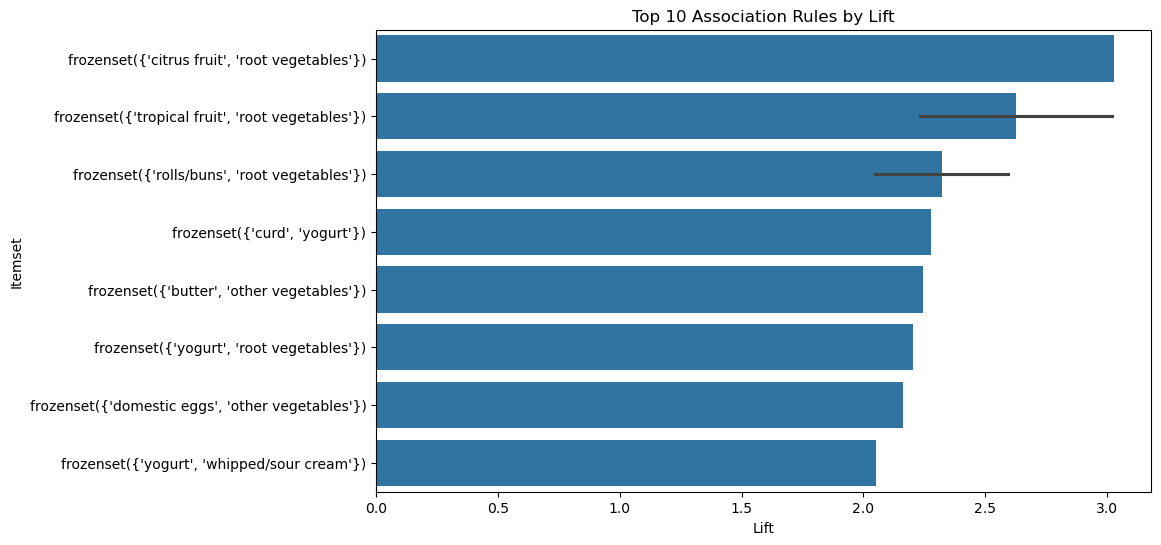

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top 10 rules based on lift
plt.figure(figsize=(10, 6))
sns.barplot(x=strong_rules['lift'].head(10), y=strong_rules['antecedents'].head(10).astype(str))
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Itemset')
plt.show()

- This bar chart shows the top 10 association rules, ranked by lift.
- The lift metric helps us understand how much more likely items are to be purchased together.

1. **Support**:
    - Support measures how frequently an itemset appears in the transactions. It helps identify common itemsets.
___   
2. **Confidence vs Lift association rules:**
    - Confidence measures the likelihood of the consequent (e.g., a product being purchased) given that the antecedent (another product) has been purchased. Lift, on the other hand, shows how much more likely the items are to be bought together compared to being independent.
    - A lift value greater than 1 means that the occurrence of the two items together is more likely than if they were independent of each other.
    - A confidence value of 0.8 means that 80% of the transactions containing the antecedent also contain the consequent.
___
3. **Zhang's Metric Interpretation:**
    - -1: Strong negative correlation (A and B rarely occur together).
    - 0: No association (A and B occur together as expected by chance).
    - +1: Strong positive correlation (A and B often occur together).
___    
4. **Leverage Interpretation:**
    - 0: No association (A and B are independent).
    - Positive values: Indicate that A and B occur together more often than expected by chance.
    - Negative values: Indicate that A and B occur together less often than expected.
___    
5. **Conviction Interpretation:**
Conviction helps you understand the reliability of a rule by looking at how often it predicts the consequent incorrectly. Higher conviction values suggest that the rule rarely fails when applied (There is no upper bound for conviction).

    - Conviction compares the likelihood that A would occur without B happening (i.e., the rule would be incorrect) to the actual frequency of incorrect predictions.
    - A higher conviction indicates a stronger rule (a lower chance that the rule is violated).
    - If conviction is 1, it means that the rule is no better than random chance. As conviction increases, the rule is considered more reliable.
    - **Example:** For a rule like “if someone buys milk, they will buy bread”, if the conviction is high, it means that the occurrence of buying milk without buying bread happens less frequently, making the rule strong.

In [ ]:
### Practice

# - Modify the code to generate rules based on different metrics, such as "confidence" or "leverage", and compare the results with the rules generated by lift.